<a href="https://colab.research.google.com/github/kimdesok/Text-classification/blob/main/Spam_Classification_LogisticR_SVM_MLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np 
import pandas as pd 

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

from sklearn.metrics import f1_score

In [2]:
#DIR_PATH = r"/home/ubuntu/Kaggle2/Data/spam.csv"
DIR_PATH = r"/content/spam.csv"
data = pd.read_csv(DIR_PATH, encoding = "latin-1")

In [3]:
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
data.drop([data.columns[col] for col in range(2,5)],axis=1,inplace=True)

In [ ]:
data

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


<AxesSubplot:xlabel='v1', ylabel='count'>

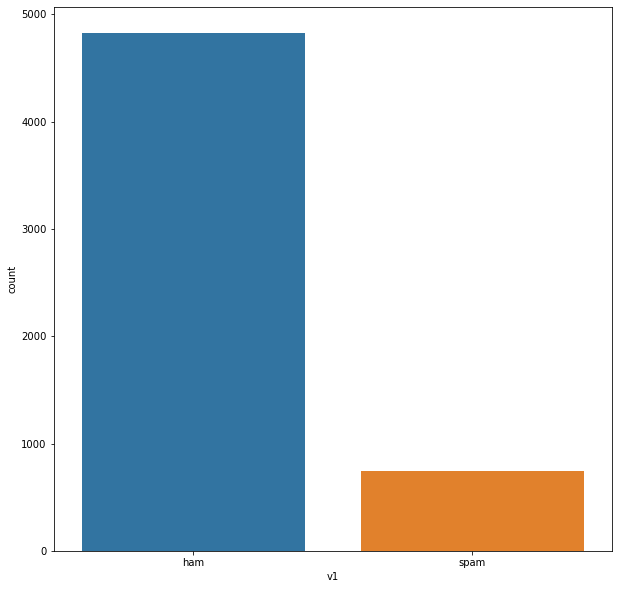

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (10,10))
sns.countplot(data = data, x= 'v1' )

In [ ]:
#Encode labels based on the class written in text.
encoder = LabelEncoder()
data['v1'] = encoder.fit_transform(data["v1"])

In [ ]:
y = data['v1']
data = data.drop('v1',axis = 1)

In [ ]:
print(data[-5:], y[-5:])

                                                     v2
5567  This is the 2nd time we have tried 2 contact u...
5568              Will Ì_ b going to esplanade fr home?
5569  Pity, * was in mood for that. So...any other s...
5570  The guy did some bitching but I acted like i'd...
5571                         Rofl. Its true to its name 5567    1
5568    0
5569    0
5570    0
5571    0
Name: v1, dtype: int64


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data, y, train_size = 0.8)

In [ ]:
vect=TfidfVectorizer(min_df=1, stop_words='english', lowercase=True)

X_tr_f = vect.fit_transform(X_train['v2'])
X_te_f = vect.transform(X_test['v2'])

In [ ]:
print(X_tr_f)

  (0, 2840)	1.0
  (1, 3355)	0.2880945208813639
  (1, 7183)	0.35922904194253397
  (1, 3979)	0.33920693537831287
  (1, 1844)	0.4252343934149764
  (1, 1955)	0.37325872200889454
  (1, 4964)	0.35182368203958536
  (1, 4722)	0.47850645900743305
  (2, 4578)	0.2220662404078283
  (2, 7296)	0.2514247546962065
  (2, 6172)	0.4271997038078028
  (2, 2240)	0.23630228520881044
  (2, 4425)	0.32520115504980823
  (2, 4947)	0.3592006713024731
  (2, 3022)	0.2755811860122965
  (2, 7299)	0.3033103560611836
  (2, 7427)	0.4271997038078028
  (2, 2341)	0.2528065625086646
  (3, 851)	0.3353429856209064
  (3, 6510)	0.2382908960972915
  (3, 1062)	0.5157598242219225
  (3, 3249)	0.3240562392848607
  (3, 6295)	0.3941759120645524
  (3, 6599)	0.29027699413245117
  (3, 4084)	0.23602232521386254
  :	:
  (4453, 4349)	0.1760109184268071
  (4453, 3311)	0.15332132125821404
  (4453, 6028)	0.1806792152799875
  (4454, 2272)	0.6243705530633936
  (4454, 853)	0.5106409583094634
  (4454, 5990)	0.5911067789867622
  (4455, 287)	0.307595

## Training with Logistic Regression, SVM, and MLP

In [ ]:
Log = LogisticRegression()
Log.fit(X_tr_f, y_train)

LogisticRegression()

In [ ]:
sv = SVC()
sv.fit(X_tr_f, y_train)

SVC()

In [ ]:
nn = MLPClassifier(hidden_layer_sizes=(128,128))
nn.fit(X_tr_f, y_train)

MLPClassifier(hidden_layer_sizes=(128, 128))

## Test

In [ ]:
log_pre = Log.predict(X_te_f)
sv_pre = sv.predict(X_te_f)
nn_pre = nn.predict(X_te_f)

In [ ]:
print(f'accuracy of Logistic Regression : {Log.score(X_te_f,y_test)} ')
print(f'accuracy of SVM : {sv.score(X_te_f,y_test)} ')
print(f'accuracy of Neural Network : {nn.score(X_te_f,y_test)} ')

accuracy of Logistic Regression : 0.968609865470852 
accuracy of SVM : 0.9811659192825112 
accuracy of Neural Network : 0.9874439461883409 


In [ ]:
print(f'F1 score of Logistic Regression : {f1_score(y_test,log_pre)} ')
print(f'F1 score of SVM : {f1_score(y_test,sv_pre)} ')
print(f'F1 score of Neural Network : {f1_score(y_test,nn_pre)} ')

F1 score of Logistic Regression : 0.8627450980392156 
F1 score of SVM : 0.9219330855018587 
F1 score of Neural Network : 0.949640287769784 
